# `Test: Classification of MNIST handwritten digits`

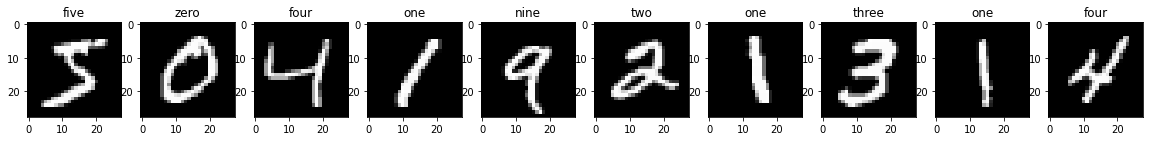

In [4]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from pathlib import Path

dir = Path.joinpath(list(Path.cwd().parents)[2], "00. DeepLearning/00_Dataset")

# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root=dir, 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

text_labels = ['zero', 'one','two','three','four', 'five','six','seven','eight','nine']

fig, axes = plt.subplots(1,10,figsize=(20, 2))
for i in range(10):
    img = train_dataset[i][0]
    label = train_dataset[i][1]
    axes[i].imshow(img.squeeze(), cmap='gray')
    axes[i].set_title(text_labels[label])

# ` Problem 1: Design a neural network to classify MNIST digits into even and odd`

- Analyze the results of train and testing in terms of loss and accuracy by using graphs or tables, respectively.

In [5]:
class EvenOddClassifier(nn.Module):
    def __init__(self):
        super(EvenOddClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        # Reshape input to [batch_size, channels, height, width]
        x = x.view(-1, 1, 28, 28)  # Assuming input images are of size 28x28
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
# Initialize the model
model = EvenOddClassifier()

# Loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary Cross Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# 리스트를 생성하여 각 epoch의 loss를 저장합니다.
losses = []

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    epoch_losses = []  # 각 epoch에서의 loss를 저장하기 위한 리스트
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        labels = (labels % 2).float().view(-1, 1)  # Convert labels to even (0) or odd (1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        epoch_losses.append(loss.item())  # 현재 배치의 loss를 저장
    
    # 각 epoch에서의 평균 loss를 계산하여 리스트에 저장합니다.
    epoch_loss = sum(epoch_losses) / len(epoch_losses)
    losses.append(epoch_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss}")

# 모델을 저장하는 코드 (학습이 끝난 후에 모델 저장)
torch.save(model.state_dict(), 'model_mnist_even_odd.pth')


Epoch [1/10], Loss: 0.12338105340856614
Epoch [2/10], Loss: 0.05067230673801742
Epoch [3/10], Loss: 0.03580316275133313
Epoch [4/10], Loss: 0.026518595154716898
Epoch [5/10], Loss: 0.02104207058052427
Epoch [6/10], Loss: 0.01580040219572754
Epoch [7/10], Loss: 0.013008666971176149
Epoch [8/10], Loss: 0.010259659268214977
Epoch [9/10], Loss: 0.008374283287167524
Epoch [10/10], Loss: 0.007909754298617587


# `Problem 2: Test The Trained Model With Your Own Handwritten Digit Images.`

- You need multiple images more than ten at leat.

- Display your testing with `imshow` and `accucray`



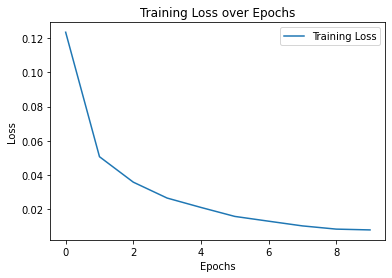

In [6]:
# Loss 그래프를 그립니다.
import matplotlib.pyplot as plt

plt.plot(losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()
